Working with SQlite and python pandas. Will be analyzing CIA factbook file "factbook.db" 

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q2 = "SELECT * FROM facts"

data = pd.read_sql_query(q2, conn)
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [3]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
data = pd.read_sql_query(q3, conn)
data.head()

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q4 = '''
SELECT * FROM facts 
WHERE population = 0;
'''
data = pd.read_sql_query(q4, conn)
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [5]:
q5 = '''
SELECT * FROM facts 
WHERE population = 7256490011;
'''
data = pd.read_sql_query(q5, conn)
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It doesn't make such sense to include Antarctica and the whole world.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != 0
AND population != 7256490011
'''

data = pd.read_sql_query(q6, conn)
data.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


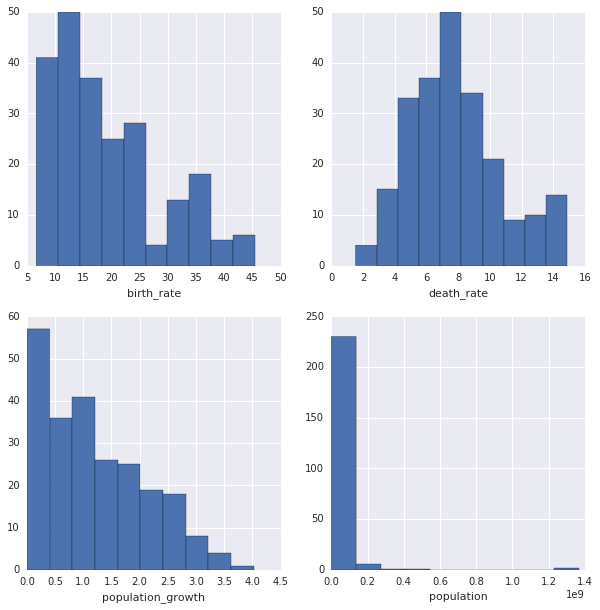

In [7]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

data["birth_rate"].hist(ax=ax1)
ax1.set_xlabel("birth_rate")
data["death_rate"].hist(ax=ax2)
ax2.set_xlabel("death_rate")
data["population_growth"].hist(ax=ax3)
ax3.set_xlabel("population_growth")
data["population"].hist(ax=ax4)
ax4.set_xlabel("population")

plt.show()

Birth Rate and Population Growth does make sense since both show a right-skewed distribution. It is hard to understand death rate because of Outliers.

In [8]:
q7 = '''
SELECT name, CAST(population as float)/CAST(area as float) "density"
FROM facts
WHERE population != 0
AND population != 7256490011
ORDER BY density DESC
'''

data = pd.read_sql_query(q7, conn)
data.head()

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


Interesting Macau has the highest population density.

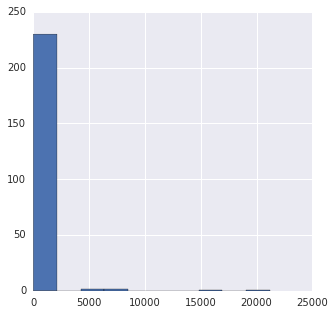

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

data['density'].hist()

plt.show()

Hard to read because of number of outliers

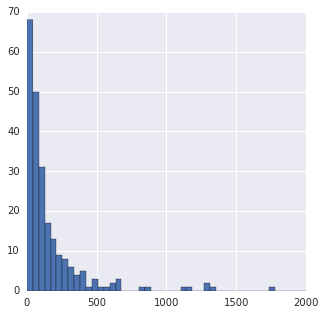

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

data['density'].hist(bins=500)
ax.set_xlim(0, 2000)
plt.show()

In [11]:
Learning Summary
SQL with Python Pandas : sqlite3, pandas, SQL queries, SQL subqueries, matplotlib, seaborn, histogram

SyntaxError: invalid syntax (<ipython-input-11-e32a1baad747>, line 1)